In [19]:
#https://github.com/pomber/covid19
import numpy as np
import pandas as pd
import json, requests

import matplotlib.pyplot as plt
import datetime

In [20]:
df_data = pd.read_csv('../data/world_corona19_data.csv', sep=',')
df_data['date'] = df_data['date'].astype('datetime64[ns]')

df_brasil = pd.read_csv('../data/brazil_corona19_data.csv', sep=',')
df_brasil['date'] = df_brasil['date'].astype('datetime64[ns]')

# df_regions = pd.read_csv('../COVID19_mobility/summary_reports/summary_report_regions.csv')
# df_full = pd.read_csv('../COVID19_mobility/summary_reports/summary_report.csv')
df = pd.read_csv('https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv', low_memory=False)#?cachebust=722f3143b586a83f')
df.rename(columns={'retail_and_recreation_percent_change_from_baseline': 'retail_and_recreation', 'grocery_and_pharmacy_percent_change_from_baseline':'grocery_and_pharmacy', 'parks_percent_change_from_baseline':'parks','transit_stations_percent_change_from_baseline': 'transit_stations', 'workplaces_percent_change_from_baseline':'workplaces', 'residential_percent_change_from_baseline':'residential'}, inplace= True)
df['date'] = df['date'].astype('datetime64[ns]')

lastUpdate = df.date.max().date()
lastData = df_data.date.max().date()

# tomorrow = today + datetime.timedelta(days=1)

df

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential
0,AE,United Arab Emirates,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
327970,ZW,Zimbabwe,NaN,NaN,2020-05-03,-51.0,-39.0,-33.0,-68.0,-20.0,26.0
327971,ZW,Zimbabwe,NaN,NaN,2020-05-04,-44.0,-37.0,-31.0,-61.0,-40.0,32.0
327972,ZW,Zimbabwe,NaN,NaN,2020-05-05,-40.0,-31.0,-30.0,-61.0,-39.0,30.0
327973,ZW,Zimbabwe,NaN,NaN,2020-05-06,-37.0,-26.0,-31.0,-57.0,-38.0,31.0


In [21]:
df[df['country_region']=='Brazil'].sub_region_1.unique()

array([nan, 'Federal District', 'State of Acre', 'State of Alagoas',
       'State of Amapá', 'State of Amazonas', 'State of Bahia',
       'State of Ceará', 'State of Espírito Santo', 'State of Goiás',
       'State of Maranhão', 'State of Mato Grosso',
       'State of Mato Grosso do Sul', 'State of Minas Gerais',
       'State of Pará', 'State of Paraíba', 'State of Paraná',
       'State of Pernambuco', 'State of Piauí', 'State of Rio de Janeiro',
       'State of Rio Grande do Norte', 'State of Rio Grande do Sul',
       'State of Rondônia', 'State of Roraima', 'State of Santa Catarina',
       'State of São Paulo', 'State of Sergipe', 'State of Tocantins'],
      dtype=object)

In [22]:
df['mean'] = df.loc[:, ['retail_and_recreation','grocery_and_pharmacy','parks','transit_stations','workplaces']].mean(axis=1)

countries = df.country_region_code.unique()
for country in countries:
    regions = df[df['country_region_code']==country].sub_region_1.unique()

    for region in regions:
        df.loc[(df['country_region_code']==country )| (df.sub_region_1 == region), 'avg7_mobility'] = df[df.sub_region_1 == region]['mean'].rolling(window=7).mean().replace([np.inf, -np.inf], 0).replace([np.nan], 0).astype('int')

df.tail()

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,mean,avg7_mobility
327970,ZW,Zimbabwe,NaN,NaN,2020-05-03,-51.0,-39.0,-33.0,-68.0,-20.0,26.0,-42.2,NaN
327971,ZW,Zimbabwe,NaN,NaN,2020-05-04,-44.0,-37.0,-31.0,-61.0,-40.0,32.0,-42.6,NaN
327972,ZW,Zimbabwe,NaN,NaN,2020-05-05,-40.0,-31.0,-30.0,-61.0,-39.0,30.0,-40.2,NaN
327973,ZW,Zimbabwe,NaN,NaN,2020-05-06,-37.0,-26.0,-31.0,-57.0,-38.0,31.0,-37.8,NaN
327974,ZW,Zimbabwe,NaN,NaN,2020-05-07,-35.0,-25.0,-34.0,-57.0,-37.0,31.0,-37.6,NaN


In [23]:
df[df['country_region']=='Brazil']

,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,mean,avg7_mobility
8567,BR,Brazil,NaN,NaN,2020-02-15,5.0,4.0,-5.0,8.0,6.0,0.0,3.6,NaN
8568,BR,Brazil,NaN,NaN,2020-02-16,2.0,3.0,-13.0,3.0,0.0,1.0,-1.0,NaN
8569,BR,Brazil,NaN,NaN,2020-02-17,-2.0,0.0,-12.0,9.0,19.0,-1.0,2.8,NaN
8570,BR,Brazil,NaN,NaN,2020-02-18,-3.0,-1.0,-11.0,9.0,15.0,-1.0,1.8,NaN
8571,BR,Brazil,NaN,NaN,2020-02-19,-1.0,-2.0,-5.0,8.0,14.0,-1.0,2.8,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10886,BR,Brazil,State of Tocantins,NaN,2020-05-03,-53.0,-21.0,-32.0,-62.0,-11.0,8.0,-35.8,-31.0
10887,BR,Brazil,State of Tocantins,NaN,2020-05-04,-32.0,-7.0,-18.0,-51.0,-16.0,11.0,-24.8,-30.0
10888,BR,Brazil,State of Tocantins,NaN,2020-05-05,-33.0,-5.0,-27.0,-47.0,-17.0,12.0,-25.8,-30.0
10889,BR,Brazil,State of Tocantins,NaN,2020-05-06,-30.0,-4.0,-18.0,-46.0,-18.0,13.0,-23.2,-30.0


In [24]:
df.drop(df[df['date'] < str(lastUpdate) ].index, axis=0, inplace= True)
# df.drop(df[df['sub_region_1'].notna()].index, axis=0, inplace= True)
df_countries = df[df['sub_region_1'].isna()]
df_countries


,country_region_code,country_region,sub_region_1,sub_region_2,date,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,mean,avg7_mobility
82,AE,United Arab Emirates,NaN,NaN,2020-05-07,-53.0,-23.0,-68.0,-63.0,-44.0,30.0,-50.2,NaN
746,AF,Afghanistan,NaN,NaN,2020-05-07,-44.0,-25.0,-21.0,-45.0,-32.0,16.0,-33.4,NaN
829,AG,Antigua and Barbuda,NaN,NaN,2020-05-07,-39.0,-26.0,-31.0,-63.0,-51.0,31.0,-42.0,NaN
912,AO,Angola,NaN,NaN,2020-05-07,-33.0,-12.0,-19.0,-45.0,-30.0,19.0,-27.8,NaN
995,AR,Argentina,NaN,NaN,2020-05-07,-73.0,-23.0,-89.0,-55.0,-40.0,21.0,-56.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
326895,VN,Vietnam,NaN,NaN,2020-05-07,-27.0,1.0,-31.0,-11.0,8.0,3.0,-12.0,NaN
326978,YE,Yemen,NaN,NaN,2020-05-07,-11.0,-2.0,-14.0,-10.0,-8.0,9.0,-9.0,NaN
327061,ZA,South Africa,NaN,NaN,2020-05-07,-48.0,-19.0,-30.0,-59.0,-52.0,26.0,-41.6,NaN
327891,ZM,Zambia,NaN,NaN,2020-05-07,-11.0,-1.0,1.0,-11.0,-13.0,13.0,-7.0,NaN


In [25]:
# lastData = df_data.date.max().date()
df_data.drop(df_data[df_data['date'] < str(lastData)].index, axis=0, inplace= True)
# df_data.drop(df_data[df_data['avg7_deaths_million'] == 0].index, axis=0, inplace= True)

df_data[df_data['country']=='United Arab Emirates']

,country,date,cases,deaths,recoveries,day,case_day,death_day,recovery_day,%var_case_day,...,recovery_day_million,avg7_cases,avg7_deaths,avg7_recoveries,avg7_case_day_million,avg7_death_day_million,avg7_recovery_day_million,perc_death,perc_recovery,active_cases
11272,United Arab Emirates,2020-05-12,19661,203,6012,105,783.0,2,631,15.15,...,0.0,638.0,8.0,408.0,0.0,0.0,0.0,1.03,30.58,13446


In [26]:
df_final = pd.merge(df_countries, df_data, how='inner', on=None, left_on='country_region', 
                 right_on='country', left_index=False, right_index=False, sort=False)   
df_final

,country_region_code,country_region,sub_region_1,sub_region_2,date_x,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,...,recovery_day_million,avg7_cases,avg7_deaths,avg7_recoveries,avg7_case_day_million,avg7_death_day_million,avg7_recovery_day_million,perc_death,perc_recovery,active_cases
0,AE,United Arab Emirates,NaN,NaN,2020-05-07,-53.0,-23.0,-68.0,-63.0,-44.0,...,0.0,638.0,8.0,408.0,0.000,0.000,0.000,1.03,30.58,13446
1,AF,Afghanistan,NaN,NaN,2020-05-07,-44.0,-25.0,-21.0,-45.0,-32.0,...,1.4,248.0,4.0,27.0,6.543,0.129,0.729,2.56,12.29,4226
2,AG,Antigua and Barbuda,NaN,NaN,2020-05-07,-39.0,-26.0,-31.0,-63.0,-51.0,...,0.0,0.0,0.0,0.0,0.000,0.000,4.414,12.00,76.00,3
3,AO,Angola,NaN,NaN,2020-05-07,-33.0,-12.0,-19.0,-45.0,-30.0,...,0.0,1.0,0.0,0.0,0.043,0.000,0.014,4.44,28.89,30
4,AR,Argentina,NaN,NaN,2020-05-07,-73.0,-23.0,-89.0,-55.0,-40.0,...,0.6,220.0,7.0,55.0,4.929,0.171,1.243,4.86,28.37,4382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,VN,Vietnam,NaN,NaN,2020-05-07,-27.0,1.0,-31.0,-11.0,8.0,...,0.0,2.0,0.0,2.0,0.000,0.000,0.000,0.00,87.50,36
117,YE,Yemen,NaN,NaN,2020-05-07,-11.0,-2.0,-14.0,-10.0,-8.0,...,0.0,6.0,0.0,0.0,0.214,0.014,0.000,15.38,1.54,54
118,ZA,South Africa,NaN,NaN,2020-05-07,-48.0,-19.0,-30.0,-59.0,-52.0,...,0.0,539.0,8.0,230.0,9.214,0.129,3.929,1.81,38.39,6787
119,ZM,Zambia,NaN,NaN,2020-05-07,-11.0,-1.0,1.0,-11.0,-13.0,...,0.0,43.0,0.0,3.0,2.414,0.043,0.200,1.59,26.53,317


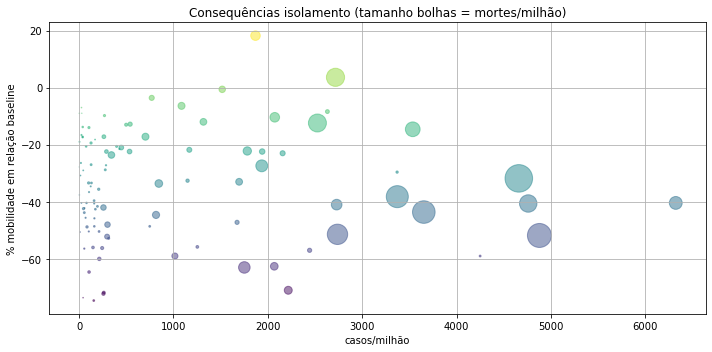

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

df_final.drop(df_final[df_final['country'] == 'Qatar'].index, axis=0, inplace= True)

close = 0.003 * df_final['mean']

df_final['norm_mean'] = (df_final['mean'] - df_final['mean'].min())/(df_final['mean'].max() - df_final['mean'].min())

fig, ax = plt.subplots(figsize=(10, 5))
# ax.scatter(df_final['cases_million'],df_final['deaths_million'], c=close, s=(df_final['norm_mean']*800), alpha=0.5)
ax.scatter(df_final['cases_million'],df_final['mean'], c=close, s=(df_final['deaths_million']*1), alpha=0.5)


ax.set_xlabel('casos/milhão')
ax.set_ylabel('% mobilidade em relação baseline')
ax.set_title('Consequências isolamento (tamanho bolhas = mortes/milhão)')
ax.grid(True)
fig.tight_layout()

plt.show()

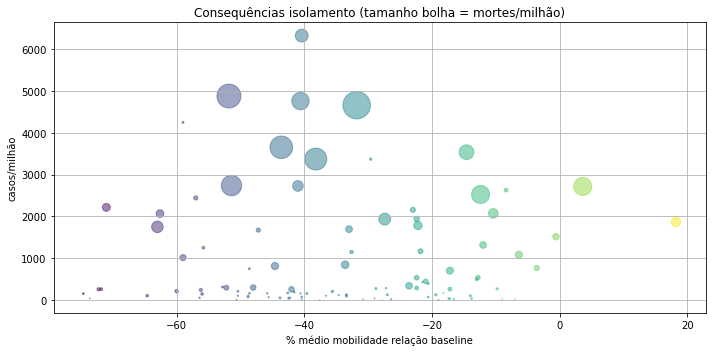

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

df_final.drop(df_final[df_final['country'] == 'Qatar'].index, axis=0, inplace= True)

close = 0.003 * df_final['mean']

df_final['norm_mean'] = (df_final['mean'] - df_final['mean'].min())/(df_final['mean'].max() - df_final['mean'].min())

fig, ax = plt.subplots(figsize=(10,5))
# ax.scatter(df_final['cases_million'],df_final['deaths_million'], c=close, s=(df_final['norm_mean']*800), alpha=0.5)
ax.scatter(df_final['mean'], df_final['cases_million'], c=close, s=(df_final['deaths_million']), alpha=0.5)


ax.set_ylabel('casos/milhão')
ax.set_xlabel('% médio mobilidade relação baseline')
ax.set_title('Consequências isolamento (tamanho bolha = mortes/milhão)')
ax.grid(True)
fig.tight_layout()

plt.show()

In [11]:
df_final['cases_million'].idxmax()

60

In [12]:
df_final[df_final.index==13][['mean','cases','cases_million','deaths_million','norm_mean']]

,mean,cases,cases_million,deaths_million,norm_mean
13,-37.6,4941,101.8,0.0,0.509091


## Brasil

In [17]:
def removeState(x):
    if x == 'State of Sao '
#     print(x[9:])
    if x.find('State') == 0:
        return x[9:]
    elif x == ('Federal District'):
        return 'Distrito Federal' 
    else:
        return x
        
        
df_final_br = df[(df['country_region']=='Brazil') & (df['sub_region_1'].notna())]
df_final_br.sub_region_1 = df_final_br.sub_region_1.apply(ad)
# df_brasil
# df_estados = df[(df['country_region']=='Brazil') & (df['sub_region_1'].notna())].sub_region_1.unique()
# df_estados.map(lambda x: x[9:-1] if x.find('State'))
# df_estados.map(removeState)
# df_estados
df_final_br.sub_region_1
df_brasil

,region,state,date,case_day,cases,death_day,deaths,day,%var_case_day,%var_death_day,avg7_cases,avg7_deaths,perc_death,avg7_perc_death
0,Norte,RO,2020-03-20,1,1,0,0,1,0.00,0.0,0.0,0.0,0.00,0.00
1,Norte,RO,2020-03-21,0,1,0,0,2,0.00,0.0,0.0,0.0,0.00,0.00
2,Norte,RO,2020-03-22,2,3,0,0,3,0.00,0.0,0.0,0.0,0.00,0.00
3,Norte,RO,2020-03-23,0,3,0,0,4,-100.00,0.0,0.0,0.0,0.00,0.00
4,Norte,RO,2020-03-24,0,3,0,0,5,0.00,0.0,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,Centro-Oeste,DF,2020-05-06,88,1906,1,34,61,76.00,0.0,90.0,0.0,1.78,1.96
1568,Centro-Oeste,DF,2020-05-07,352,2258,1,35,62,300.00,0.0,128.0,0.0,1.55,1.86
1569,Centro-Oeste,DF,2020-05-08,184,2442,2,37,63,-47.73,100.0,139.0,1.0,1.52,1.79
1570,Centro-Oeste,DF,2020-05-09,134,2576,2,39,64,-27.17,0.0,144.0,1.0,1.51,1.72


In [18]:
df_final_br.sub_region_1.unique()

array(['Distrito Federal', 'Acre', 'Alagoas', 'Amapá', 'Amazonas',
       'Bahia', 'Ceará', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará',
       'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima',
       'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins'],
      dtype=object)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

df_final.drop(df_final[df_final['country'] != 'Brazil'].index, axis=0, inplace= True)

close = 0.003 * df_final['mean']

df_final['norm_mean'] = (df_final['mean'] - df_final['mean'].min())/(df_final['mean'].max() - df_final['mean'].min())

fig, ax = plt.subplots(figsize=(10,5))
# ax.scatter(df_final['cases_million'],df_final['deaths_million'], c=close, s=(df_final['norm_mean']*800), alpha=0.5)
ax.scatter(df_final['mean'], df_final['cases_million'], c=close, s=(df_final['deaths_million']*100), alpha=0.5)

ax.set_ylabel('casos/milhão')
ax.set_xlabel('% médio mobilidade relação baseline')
ax.set_title('Consequências isolamento (tamanho bolha = mortes/milhão)')
ax.grid(True)
fig.tight_layout()

plt.show()

In [ ]:
lastUpdate